In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np

# for graphing
import matplotlib.pyplot as plt
import seaborn as sns

# regression libraries (sklearn) will be imported in the process to maintain an overview of when we need what

## Introduction
1. We have a target, therefore we use supervised learning. 
2. As we are seeking out a categorical value as a target (intiger and categroical scale), we cannot perform a regression analysis. We will go with a classification model
3. We know about and feel comfortable with the following classification models: <br>
    3.1. Decision Tree <br>
    3.2. Logisitc Regression** <br>
    3.3. KNN <br>


** Logisitc Regression is only used when we have one dependent variable and one independent variables. To carry this type of model out for multiple variables, we would need to do a mulitnominal or ordinal regression, however, we are not comfortable with these, so we will not attempt them on our first go. 

#### Models
we will use:
- decision tree
- KNN

#### Metrics
we will use:
- confusion matrix
- f1
- recall
- precision
- accuracy

#### To check our hyperparameters and their performance when fitting the model we will use a grid search (if we have time)

In [30]:
df = pd.read_csv("../Data/cleaned_cookie_data.csv", index_col=0)

In [31]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor
0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,melted,15.2,raisins,1.30
1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,melted,12.4,raisins,1.71
2,0.18,1.9,360,33.0,106.0,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78
3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59
4,0.24,2.4,770,6.0,33.0,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30


## Pre-processing
For preprocessing we will do the following:
- encoding categorical variables
- define X and y
- split into train and test (we chose a 80:20 ratio)

##### Encoding, dummy variables for mixins

In [33]:
df["mixins"].value_counts().index

Index(['chocolate', 'raisins', 'chocolate, oats', 'nuts, chocolate',
       'nuts,raisins', 'nuts, oats, chocolate', 'nuts, oats',
       'chocolate, peanut butter', 'raisins, oats', 'peanut butter', 'oats',
       'chocolate, oats, peanut butter', 'No mixins'],
      dtype='object')

In [34]:
# create dummy variables
mixes = ['raisins', 'chocolate', 'oats', 'nuts', 'peanut butter', 'No mixins']

# Your code here
for i in mixes:
    df[i]=0

In [35]:
# fill dummy
for mix in mixes:
    
    df[mix] = df.mixins.str.contains(mix, regex=False).astype(int)

In [36]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,raisins,chocolate,oats,nuts,peanut butter,No mixins
0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,1,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,1,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,0,1,0,1,0,0
3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,0,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,0,1,1,1,0,0


In [37]:
# drop mixins
df.drop("mixins", axis=1, inplace=True)

##### Encoding, dummy variables for butter

In [38]:
# we only have two types of butter
# we can just replace the values with [1,0] for [melted, cubed] using a repalce funciton
df["butter type"] = np.where(df["butter type"] == "melted", 1, 0)

In [39]:
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,crunch factor,raisins,chocolate,oats,nuts,peanut butter,No mixins
0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,1,15.2,1.30,1,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,1,12.4,1.71,1,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,8.21,0.83,14.0,9,1,9.4,1.78,0,1,0,1,0,0
3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,1,12.2,1.59,0,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,8.09,0.57,9.4,5,0,19.8,1.30,0,1,1,1,0,0


###### Splitting, fitting, training

In [40]:
# Selecting data that are our features and the target variables.
y = df[['quality']]
X = df.drop(columns=['quality'])

In [41]:
# Importing sklearn library for model selection to split between train and test
from sklearn.model_selection import train_test_split

# Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [90]:
 # Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Creating the instance of the Decision Tree with maximum depth equals to 1
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)

# Fitting the model on train set 
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [91]:
# Predicting observation on our test set. 
y_pred = dtree.predict(X_test)

In [92]:
# Calculating and printing the accuracy score between the y_test value and the y_predicted values. 
print(f"Accuracy is: {accuracy_score(y_test,y_pred)}")

Accuracy is: 0.5539714867617108


In [93]:
# Importing the required libraries to calculate the metrics of the ML models we are calculating
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Decision tree classification
print(f"Confusion matrix = \n {confusion_matrix(y_test, y_pred)}")
print(f"precision score = {precision_score(y_test, y_pred, average='micro')}")
print(f"recall = {recall_score(y_test, y_pred, average='micro')}")
print(f"f1 score = {f1_score(y_test, y_pred, average='micro')}")


Confusion matrix = 
 [[  0   4   0   0   0   0   0   0]
 [  2  64  25   1   2   0   0   0]
 [  4  40  45  24   6   0   0   0]
 [  0   1  11 134  90   6   1   0]
 [  0   2   6  58 228  47   1   0]
 [  0   0   0   6  62  67   4   0]
 [  0   0   0   2  22   9   6   0]
 [  0   0   0   0   2   0   0   0]]
precision score = 0.5539714867617108
recall = 0.5539714867617108
f1 score = 0.5539714867617108


In [96]:
"""# Drawing the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
"""

'# Drawing the decision tree\nfrom sklearn.externals.six import StringIO  \nfrom IPython.display import Image  \nfrom sklearn.tree import export_graphviz\nimport pydotplus\n\ndot_data = StringIO()\n\nexport_graphviz(dtree, out_file=dot_data,  \n                filled=True, rounded=True,\n                special_characters=True)\n\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \nImage(graph.create_png())\n'

In [95]:
"""from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(false_positive_rate, true_positive_rate)"""

'from sklearn.metrics import roc_curve, auc\n\nfalse_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)\n\nroc_auc = auc(false_positive_rate, true_positive_rate)'

In [99]:
max_depths = np.linspace(1, 20, 20, endpoint=True)

In [100]:
print(max_depths)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


In [102]:
train_results = []
test_results = []
for max_depth in max_depths:
    dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=max_depth, min_samples_leaf=5)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    accuracy_score(y_test,y_pred)
    

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

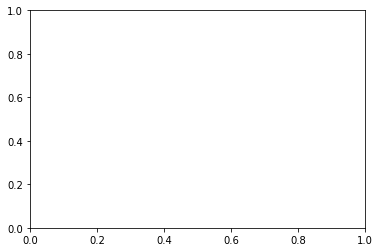

In [107]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "r", label="Train Accuracy")
line2, = plt.plot(max_depths, test_results, "b", label="Test Accuracy")